<a href="https://colab.research.google.com/github/2022civarshara-dot/ML_Lab/blob/main/ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def candidate_elimination(examples):
    """
    Implements the Candidate Elimination algorithm.

    Args:
        examples: A list of tuples, where each tuple represents an example.
                  The last element of each tuple is the class label (True for positive, False for negative).

    Returns:
        A tuple containing the final general hypothesis and the final specific hypothesis.
    """
    num_attributes = len(examples[0]) - 1
    specific_hypothesis = ['0'] * num_attributes
    general_hypothesis = [['?' for _ in range(num_attributes)]]

    for example in examples:
        attributes = example[:-1]
        label = example[-1]

        if label:  # Positive example
            # Update specific hypothesis
            for i in range(num_attributes):
                if specific_hypothesis[i] == '0':
                    specific_hypothesis[i] = attributes[i]
                elif specific_hypothesis[i] != attributes[i]:
                    specific_hypothesis[i] = '?'

            # Remove inconsistent hypotheses from general hypothesis
            general_hypothesis = [h for h in general_hypothesis if all(h[i] == '?' or h[i] == attributes[i] for i in range(num_attributes))]

        else:  # Negative example
            # Refine general hypothesis
            new_general_hypothesis = []
            for h in general_hypothesis:
                if all(h[i] == '?' or h[i] == attributes[i] for i in range(num_attributes)):
                    for i in range(num_attributes):
                        if h[i] == '?':
                            for value in set([ex[:-1][i] for ex in examples]):
                                if value != attributes[i]:
                                    new_h = list(h)
                                    new_h[i] = value
                                    if all(new_h[j] == '?' or new_h[j] == specific_hypothesis[j] for j in range(num_attributes)):
                                        new_general_hypothesis.append(new_h)
                else:
                    new_general_hypothesis.append(h)
            general_hypothesis = new_general_hypothesis

    return general_hypothesis, specific_hypothesis

# Example usage:
examples = [
    (('Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'), True),
    (('Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same'), True),
    (('Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change'), False),
    (('Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change'), True)
]

general, specific = candidate_elimination(examples)

print("Final General Hypothesis:")
for h in general:
    print(h)
print("\nFinal Specific Hypothesis:")
print(specific)

Final General Hypothesis:

Final Specific Hypothesis:
['?']


In [ ]:
import numpy as np

def candidate_elimination(examples):
    """
    Implements the Candidate Elimination algorithm.

    Args:
        examples: A list of tuples, where each tuple represents an example.
                  The last element of each tuple is the class label (True for positive, False for negative).

    Returns:
        A tuple containing the final general hypothesis and the final specific hypothesis.
    """
    num_attributes = len(examples[0][0])  # Number of attributes
    specific_hypothesis = ['0'] * num_attributes
    general_hypothesis = [['?' for _ in range(num_attributes)]]

    # Get the set of all possible attribute values from the training examples
    all_values = [set() for _ in range(num_attributes)]
    for example in examples:
        attributes = example[0]
        for i, val in enumerate(attributes):
            all_values[i].add(val)

    for example in examples:
        attributes = example[0]
        label = example[1]

        if label:  # Positive example
            # Update specific hypothesis (S)
            for i in range(num_attributes):
                if specific_hypothesis[i] == '0':
                    specific_hypothesis[i] = attributes[i]
                elif specific_hypothesis[i] != attributes[i]:
                    specific_hypothesis[i] = '?'

            # Remove inconsistent hypotheses from general hypothesis (G)
            new_general_hypothesis = []
            for h in general_hypothesis:
                # Check if current hypothesis matches the example
                if all(h[i] == '?' or h[i] == attributes[i] for i in range(num_attributes)):
                    new_general_hypothesis.append(h)
            general_hypothesis = new_general_hypothesis

        else:  # Negative example
            # Refine general hypothesis (G) based on negative example
            new_general_hypothesis = []
            for h in general_hypothesis:
                # If the hypothesis is inconsistent with the negative example, we keep it
                if any(h[i] != '?' and h[i] != attributes[i] for i in range(num_attributes)):
                    new_general_hypothesis.append(h)
                else:
                    # Generate new general hypotheses by specializing existing ones
                    for i in range(num_attributes):
                        if h[i] == '?':
                            for value in all_values[i]:
                                if value != attributes[i]:
                                    new_h = list(h)
                                    new_h[i] = value
                                    if all(new_h[j] == '?' or new_h[j] == specific_hypothesis[j] for j in range(num_attributes)):
                                        new_general_hypothesis.append(new_h)
            general_hypothesis = new_general_hypothesis

    return general_hypothesis, specific_hypothesis


# Example usage:
examples = [
    (('Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'), True),
    (('Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same'), True),
    (('Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change'), False),
    (('Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change'), True)
]

general, specific = candidate_elimination(examples)

print("Final General Hypothesis:")
for h in general:
    print(h)
print("\nFinal Specific Hypothesis:")
print(specific)


Final General Hypothesis:
['Sunny', '?', '?', '?', '?', '?']
['?', 'Warm', '?', '?', '?', '?']

Final Specific Hypothesis:
['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [ ]:
#Lab 2
import numpy as np

def candidate_elimination(examples):
    """
    Implements the Candidate Elimination algorithm.

    Args:
        examples: A list of tuples, where each tuple represents an example.
                  The last element of each tuple is the class label (True for positive, False for negative).

    Returns:
        A tuple containing the final general hypothesis and the final specific hypothesis.
    """
    num_attributes = len(examples[0][0])  # Number of attributes
    specific_hypothesis = ['0'] * num_attributes
    general_hypothesis = [['?' for _ in range(num_attributes)]]

    # Get the set of all possible attribute values from the training examples
    all_values = [set() for _ in range(num_attributes)]
    for example in examples:
        attributes = example[0]
        for i, val in enumerate(attributes):
            all_values[i].add(val)

    for example in examples:
        attributes = example[0]
        label = example[1]

        if label:  # Positive example
            # Update specific hypothesis (S)
            for i in range(num_attributes):
                if specific_hypothesis[i] == '0':
                    specific_hypothesis[i] = attributes[i]
                elif specific_hypothesis[i] != attributes[i]:
                    specific_hypothesis[i] = '?'

            # Remove inconsistent hypotheses from general hypothesis (G)
            new_general_hypothesis = []
            for h in general_hypothesis:
                # Check if current hypothesis matches the example
                if all(h[i] == '?' or h[i] == attributes[i] for i in range(num_attributes)):
                    new_general_hypothesis.append(h)
            general_hypothesis = new_general_hypothesis

        else:  # Negative example
            # Refine general hypothesis (G) based on negative example
            new_general_hypothesis = []
            for h in general_hypothesis:
                # If the hypothesis is inconsistent with the negative example, we keep it
                if any(h[i] != '?' and h[i] != attributes[i] for i in range(num_attributes)):
                    new_general_hypothesis.append(h)
                else:
                    # Generate new general hypotheses by specializing existing ones
                    for i in range(num_attributes):
                        if h[i] == '?':
                            for value in all_values[i]:
                                if value != attributes[i]:
                                    new_h = list(h)
                                    new_h[i] = value
                                    if all(new_h[j] == '?' or new_h[j] == specific_hypothesis[j] for j in range(num_attributes)):
                                        new_general_hypothesis.append(new_h)
            general_hypothesis = new_general_hypothesis

    return general_hypothesis, specific_hypothesis


# Example usage:
examples = [
    (('Senior', 'Low', 'No', 'Fair', 'Unemployed', 'No'), True),
    (('Young', 'High', 'No', 'Fair', 'Employed', 'Yes'), False),
    (('Young', 'Medium', 'Yes', 'Excellent', 'Employed', 'No'), False),
    (('Middle', 'High', 'Yes', 'Excellent', 'Employed', 'Yes'), True),
    (('Young', 'Low', 'Yes', 'Fair', 'Unemployed', 'No'), True),
    (('Senior', 'Medium', 'No', 'Fair', 'Employed', 'Yes'), True)
]

general, specific = candidate_elimination(examples)

print("Final General Hypothesis:")
for h in general:
    print(h)
print("\nFinal Specific Hypothesis:")
print(specific)


Final General Hypothesis:

Final Specific Hypothesis:
['?', '?', '?', '?', '?', '?']


In [6]:
pip install orange3 pandas scikit-learn

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.3/535.3 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.3/270.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/6

In [7]:
#Lab 3
import Orange
import numpy as np

# Load dataset (Iris dataset)
data = Orange.data.Table("iris")

# --- Example-based learning using CN2 (propositional rules) ---
print("=== CN2 Rule Learning ===")
cn2_learner = Orange.classification.rules.CN2Learner()
cn2_classifier = cn2_learner(data)

for rule in cn2_classifier.rule_list:
    print(rule)

# --- FOIL-style Rule Learning (Simulated) ---
print("\n=== FOIL-style Rule Learning (Simulated) ===")

def foil_like_rule_learning(data):
    """
    A simplified FOIL-style rule generator.
    Handles both discrete and continuous attributes.
    """
    rules = []
    domain = data.domain
    class_var = domain.class_var

    for attr in domain.attributes:
        if attr.is_discrete:
            # For categorical attributes
            for value in attr.values:
                for class_value in class_var.values:
                    rules.append(f"IF {attr.name} = {value} THEN {class_var.name} = {class_value}")
        else:
            # For continuous attributes, compute mean using NumPy
            column = np.array([d[attr] for d in data if not np.isnan(d[attr])], dtype=float)
            if len(column) == 0:
                continue
            mean_val = np.mean(column)

            for class_value in class_var.values:
                rules.append(f"IF {attr.name} > {mean_val:.2f} THEN {class_var.name} = {class_value}")
                rules.append(f"IF {attr.name} <= {mean_val:.2f} THEN {class_var.name} = {class_value}")

    return rules

foil_rules = foil_like_rule_learning(data)

# Print some example FOIL-style rules
for i, rule in enumerate(foil_rules[:10], start=1):
    print(f"{i}. {rule}")

print("\nNote: This simulates FOIL-style rule induction using continuous thresholds, "
      "since Orange’s Iris dataset features are numeric.")

=== CN2 Rule Learning ===
IF petal length<=3.0 AND sepal width>=2.9 THEN iris=Iris-setosa 
IF petal width>=1.8 AND sepal length>=6.0 THEN iris=Iris-virginica 
IF sepal length>=4.9 AND sepal width>=3.1 THEN iris=Iris-versicolor 
IF petal length<=4.9 AND petal width>=1.7 THEN iris=Iris-virginica 
IF petal width>=1.8 THEN iris=Iris-virginica 
IF petal length<=5.0 AND sepal width>=2.4 THEN iris=Iris-versicolor 
IF sepal width>=2.8 THEN iris=Iris-virginica 
IF petal width<=1.0 AND sepal length>=5.0 THEN iris=Iris-versicolor 
IF sepal width>=2.7 THEN iris=Iris-versicolor 
IF sepal width>=2.6 THEN iris=Iris-virginica 
IF sepal length>=5.5 AND sepal length>=6.2 THEN iris=Iris-versicolor 
IF sepal length<=5.5 AND petal length>=4.0 THEN iris=Iris-versicolor 
IF sepal length>=6.0 THEN iris=Iris-virginica 
IF sepal length<=4.5 THEN iris=Iris-setosa 
IF TRUE THEN iris=Iris-virginica 

=== FOIL-style Rule Learning (Simulated) ===
1. IF sepal length > 5.84 THEN iris = Iris-setosa
2. IF sepal length <

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris(as_frame=True)
data = iris.frame

# Display first few rows
print(data.head())

# Split into train/test
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
from Orange.data import Table, Domain, ContinuousVariable, DiscreteVariable

# Define the domain (feature types)
features = [ContinuousVariable(var) for var in iris.feature_names]
target = DiscreteVariable('target', values=list(iris.target_names))
domain = Domain(features, target)

# Convert to Orange Table
orange_data = Table.from_list(domain, data.values)

In [ ]:
from Orange.classification.rules import CN2Learner

# Initialize learner
learner = CN2Learner()

# Train
classifier = learner(orange_data)

# Print the induced rules
for rule in classifier.rule_list:
    print(rule)

IF petal length (cm)<=3.0 AND sepal width (cm)>=2.9 THEN target=setosa 
IF petal width (cm)>=1.8 AND sepal length (cm)>=6.0 THEN target=virginica 
IF sepal length (cm)>=4.9 AND sepal width (cm)>=3.1 THEN target=versicolor 
IF petal length (cm)<=4.9 AND petal width (cm)>=1.7 THEN target=virginica 
IF petal width (cm)>=1.8 THEN target=virginica 
IF petal length (cm)<=5.0 AND sepal width (cm)>=2.4 THEN target=versicolor 
IF sepal width (cm)>=2.8 THEN target=virginica 
IF petal width (cm)<=1.0 AND sepal length (cm)>=5.0 THEN target=versicolor 
IF sepal width (cm)>=2.7 THEN target=versicolor 
IF sepal width (cm)>=2.6 THEN target=virginica 
IF sepal length (cm)>=5.5 AND sepal length (cm)>=6.2 THEN target=versicolor 
IF sepal length (cm)<=5.5 AND petal length (cm)>=4.0 THEN target=versicolor 
IF sepal length (cm)>=6.0 THEN target=virginica 
IF sepal length (cm)<=4.5 THEN target=setosa 
IF TRUE THEN target=setosa 


In [ ]:
from Orange.evaluation import TestOnTestData, CA

# Convert train/test to Orange format
train_orange = Table.from_list(domain, train_data.values)
test_orange = Table.from_list(domain, test_data.values)

# Evaluate accuracy
results = TestOnTestData(train_orange, test_orange, [learner])
print("Classification Accuracy:", CA(results))

Classification Accuracy: [1.]


In [ ]:
import math

def foil_gain(p0, n0, p1, n1):
    # FOIL-Gain formula
    if p1 == 0:
        return 0
    return p1 * (math.log2(p1 / (p1 + n1)) - math.log2(p0 / (p0 + n0)))

def foil_algorithm(examples, target_attr):
    """
    examples: list of dicts, each with features and target
    target_attr: string name of target attribute
    """
    rules = []
    positives = [ex for ex in examples if ex[target_attr] == 1]
    negatives = [ex for ex in examples if ex[target_attr] == 0]

    while positives:
        current_rule = []
        covered_pos = positives
        covered_neg = negatives

        while covered_neg:
            best_gain = 0
            best_literal = None

            # Try all possible feature-value pairs
            for attr in examples[0].keys():
                if attr == target_attr:
                    continue

                for val in set(ex[attr] for ex in examples):
                    p1 = len([ex for ex in covered_pos if ex[attr] == val])
                    n1 = len([ex for ex in covered_neg if ex[attr] == val])
                    gain = foil_gain(len(covered_pos), len(covered_neg), p1, n1)
                    if gain > best_gain:
                        best_gain, best_literal = gain, (attr, val)

            if not best_literal:
                break

            attr, val = best_literal
            current_rule.append((attr, val))

            # Keep only examples matching this literal
            covered_pos = [ex for ex in covered_pos if ex[attr] == val]
            covered_neg = [ex for ex in covered_neg if ex[attr] == val]

        # Save the rule
        rules.append((current_rule, 1))
        positives = [ex for ex in positives if ex not in covered_pos]

    return rules

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------------------------------------
# 1. Generate a random supervised classification dataset
# -----------------------------------------------------------

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
df["Target"] = y

print("Random dataset sample:")
print(df.head())

# -----------------------------------------------------------
# 2. Train-test split
# -----------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Target"]),
    df["Target"],
    test_size=0.30,
    random_state=42
)

# -----------------------------------------------------------
# 3. Scaling
# -----------------------------------------------------------

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------------------------------------
# 4. Base Decision Tree
# -----------------------------------------------------------

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# -----------------------------------------------------------
# 5. Bagging (FIXED for sklearn >=1.4)
# -----------------------------------------------------------

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),   # <-- FIXED
    n_estimators=50,
    random_state=42
)
bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_test)

# -----------------------------------------------------------
# 6. Boosting (AdaBoost FIXED)
# -----------------------------------------------------------

boost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # <-- FIXED
    n_estimators=50,
    learning_rate=0.8,
    random_state=42
)
boost_model.fit(X_train, y_train)
boost_pred = boost_model.predict(X_test)

# -----------------------------------------------------------
# 7. Evaluation Function
# -----------------------------------------------------------

def evaluate(model_name, y_true, y_pred):
    print("\n===================================")
    print(f" Model: {model_name}")
    print("===================================")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# -----------------------------------------------------------
# 8. Print Model Performances
# -----------------------------------------------------------

evaluate("Decision Tree", y_test, dt_pred)
evaluate("Bagging", y_test, bag_pred)
evaluate("Boosting (AdaBoost)", y_test, boost_pred)


Random dataset sample:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0  -1.030931   1.391626   0.547274   0.928932  -1.738880   1.250002   
1  -2.766254   1.247870  -0.303691   1.083145   0.710836   1.968202   
2  -0.558987   0.299849   1.527071   0.360442  -1.360209   1.100793   
3  -1.350289  -2.046078  -0.614264   0.126459  -0.783923   5.895026   
4  -0.275754  -0.728495   0.027727  -0.660834  -1.928161   3.544945   

   Feature_6  Feature_7  Feature_8  Feature_9  Target  
0   1.332551   1.578256   2.124722  -0.318434       0  
1  -1.794192   2.346422   1.700778  -0.001190       1  
2  -0.755951   1.331933   2.041105  -0.824404       0  
3  -0.915477  -3.184768  -0.399260  -3.920960       0  
4   1.446944  -1.111662   0.313766  -2.376528       0  

 Model: Decision Tree
Accuracy: 0.8566666666666667

Confusion Matrix:
[[136  26]
 [ 17 121]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.

K- Means


===== DOCUMENT CLUSTERS =====
Cluster 1: Artificial intelligence is transforming the world.
Cluster 0: Machine learning is a subset of artificial intelligence.
Cluster 0: Deep learning uses neural networks.
Cluster 0: Neural networks train on large datasets.
Cluster 1: The cat sits on the mat.
Cluster 1: Cats and dogs are common household pets.
Cluster 1: Dogs enjoy playing fetch with their owners.
Cluster 1: Pets like cats and dogs are loved by families.

===== SIMILARITY SCORES WITH QUERY =====
0.0000  -->  Artificial intelligence is transforming the world.
0.6438  -->  Machine learning is a subset of artificial intelligence.
0.2656  -->  Deep learning uses neural networks.
0.0000  -->  Neural networks train on large datasets.
0.0000  -->  The cat sits on the mat.
0.0000  -->  Cats and dogs are common household pets.
0.0000  -->  Dogs enjoy playing fetch with their owners.
0.0000  -->  Pets like cats and dogs are loved by families.

Most similar document:
Machine learning is a subse

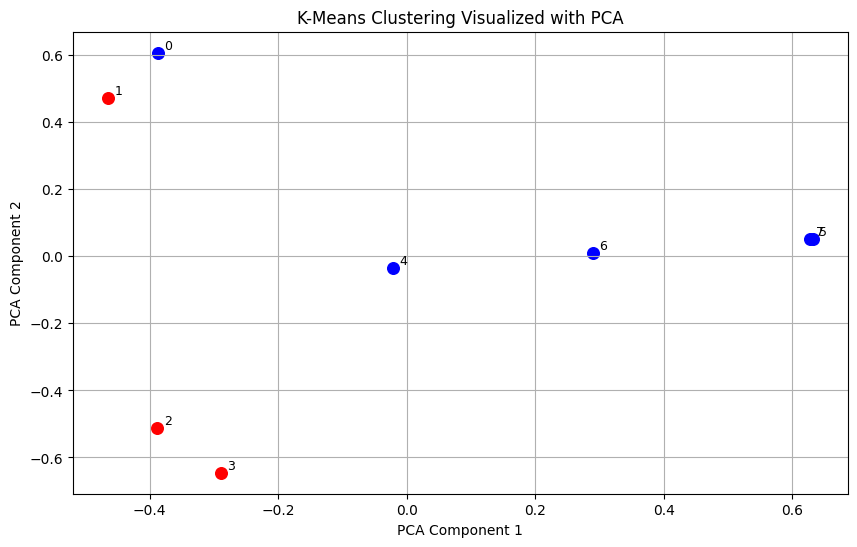

In [ ]:
!pip install scikit-learn matplotlib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------------------------
# 1. Sample text documents
# --------------------------------------------------------------
documents = [
    "Artificial intelligence is transforming the world.",
    "Machine learning is a subset of artificial intelligence.",
    "Deep learning uses neural networks.",
    "Neural networks train on large datasets.",
    "The cat sits on the mat.",
    "Cats and dogs are common household pets.",
    "Dogs enjoy playing fetch with their owners.",
    "Pets like cats and dogs are loved by families."
]

# --------------------------------------------------------------
# 2. Convert documents to TF-IDF vectors
# --------------------------------------------------------------
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# --------------------------------------------------------------
# 3. Perform K-means clustering
# --------------------------------------------------------------
k = 2  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

print("\n===== DOCUMENT CLUSTERS =====")
for i, label in enumerate(labels):
    print(f"Cluster {label}: {documents[i]}")

# --------------------------------------------------------------
# 4. Similarity Recognition Example
# --------------------------------------------------------------
query = ["AI and machine learning are closely related."]

query_vec = vectorizer.transform(query)
similarities = cosine_similarity(query_vec, X).flatten()

print("\n===== SIMILARITY SCORES WITH QUERY =====")
for i, score in enumerate(similarities):
    print(f"{score:.4f}  -->  {documents[i]}")

best_match = np.argmax(similarities)

print("\nMost similar document:")
print(documents[best_match])

# --------------------------------------------------------------
# 5. PCA for Visualization (2D graph)
# --------------------------------------------------------------
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))

# Plot each document
for i in range(len(X_2d)):
    plt.scatter(X_2d[i, 0], X_2d[i, 1],
                c='red' if labels[i] == 0 else 'blue', s=70)
    plt.text(X_2d[i, 0] + 0.01, X_2d[i, 1] + 0.01, str(i), fontsize=9)

plt.title("K-Means Clustering Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

SOM

Training SOM...
Training complete!


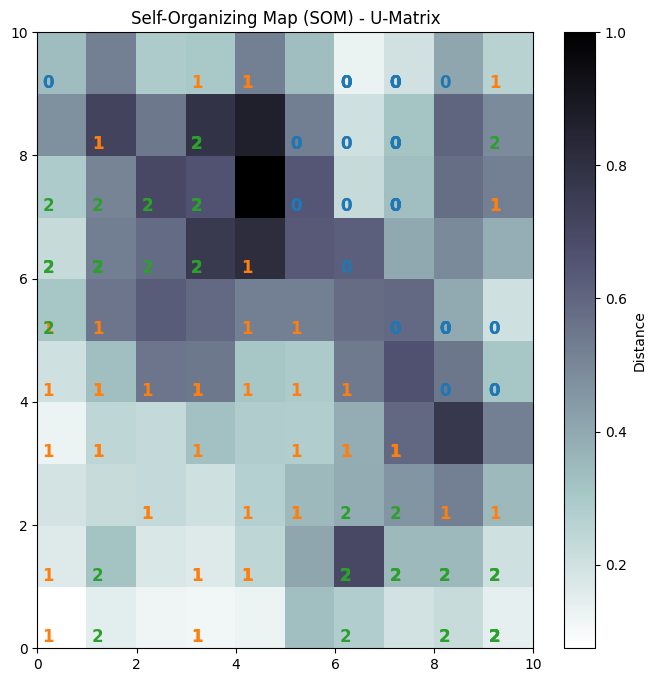

In [4]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris


# -----------------------------
# 1. Load and Normalize Dataset
# -----------------------------
data = load_iris()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# -----------------------------
# 2. Create and Train SOM
# -----------------------------
som_size = (10, 10)  # SOM grid size (10x10 neurons)

som = MiniSom(x=som_size[0], y=som_size[1],
              input_len=X_scaled.shape[1],
              sigma=1.0, learning_rate=0.5)

som.random_weights_init(X_scaled)
print("Training SOM...")
som.train_random(X_scaled, num_iteration=1000)
print("Training complete!")


# -----------------------------
# 3. Visualizing SOM
# -----------------------------
plt.figure(figsize=(8, 8))

# U-Matrix (distance map)
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar(label='Distance')

# Plot each data point on SOM grid
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[0] + 0.1, w[1] + 0.1,
             str(data.target[i]),
             color=plt.cm.tab10(data.target[i]),
             fontdict={'weight': 'bold', 'size': 12})

plt.title("Self-Organizing Map (SOM) - U-Matrix")
plt.show()

Bayesian Network

In [3]:
import numpy as np

# Prior probabilities
P_rain = {
    0: 0.7,   # Rain = False
    1: 0.3    # Rain = True
}

# Conditional probability P(WetGrass | Rain)
P_wet_given_rain = {
    0: {0: 0.9, 1: 0.1},   # If Rain=False → WetGrass=False/True
    1: {0: 0.1, 1: 0.9}    # If Rain=True  → WetGrass=False/True
}

# Evidence: WetGrass = True
wet = 1

# Compute P(WetGrass)
P_wet = (
    P_wet_given_rain[0][wet] * P_rain[0] +
    P_wet_given_rain[1][wet] * P_rain[1]
)

# Bayes rule: P(Rain | WetGrass = True)
posterior = {
    r: P_wet_given_rain[r][wet] * P_rain[r] / P_wet
    for r in [0, 1]
}

print("P(Rain=False | WetGrass=True) =", posterior[0])
print("P(Rain=True | WetGrass=True)  =", posterior[1])

P(Rain=False | WetGrass=True) = 0.20588235294117643
P(Rain=True | WetGrass=True)  = 0.7941176470588235
